## Importing the Libraries

In [1]:
import numpy as np
from keras.preprocessing import image
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Data Preprocessing

In [2]:
directory = "../input/bengali-digits/bengali_digits"

### Training Data

In [3]:
training = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=0,
    validation_split=0.25,
    subset="training",
    interpolation="bilinear"
)

Found 15620 files belonging to 10 classes.
Using 11715 files for training.


2022-06-10 21:09:21.352409: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
# train_gen = ImageDataGenerator(rescale = 1./255,
#                               shear_range = 0.3,
#                               zoom_range = 0.2,
#                               horizontal_flip = True)
# training_set = train_gen.flow_from_directory('D:/bengali digit classification/bengali_digits/train',
#                                             target_size = (64, 64),
#                                             batch_size = 30,
#                                             class_mode = 'categorical')

### Testing Data

In [5]:
validation = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=0,
    validation_split=0.25,
    subset="validation",
    interpolation="bilinear"
)

Found 15620 files belonging to 10 classes.
Using 3905 files for validation.


In [6]:
# test_gen = ImageDataGenerator(rescale = 1./255)
# test_set = test_gen.flow_from_directory('D:/bengali digit classification/bengali_digits/test',
#                                        target_size = (64, 64),
#                                        batch_size = 30,
#                                        class_mode = 'categorical')

## Building the Convolutional Neural Network

### Initializing the CNN

In [7]:
cnn = tf.keras.models.Sequential()

### Adding The first Convolution Layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64, 64, 3]))

### Adding the first Max Pooling Layer

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### Adding the second Convolution Layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))

### Adding the second Max Pooling Layer

In [11]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### Adding the Flattening Layer

In [14]:
cnn.add(tf.keras.layers.Flatten())

### Adding the First Fully Connected Layer

In [15]:
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))

### Adding a Dropout Layer

In [16]:
cnn.add(tf.keras.layers.Dropout(0.2))

### Adding the Second Fully Connected Layer

In [17]:
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))

### Adding another Dropout Layer

In [18]:
cnn.add(tf.keras.layers.Dropout(0.2))

In [19]:
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))

### Adding the Output Layer

In [20]:
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

### Adding Early Stopping Clause

In [21]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.0001,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

## Training the Model

### Compiling the CNN

In [22]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Fitting the Model

In [23]:
model_history=cnn.fit(x=training,validation_data=validation,epochs=9,callbacks=early_stop)

Epoch 1/9


2022-06-10 21:09:28.195300: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


367/367 [==============================] - 25s 64ms/step - loss: 2.3198 - accuracy: 0.3403 - val_loss: 1.0327 - val_accuracy: 0.6822
Epoch 2/9
367/367 [==============================] - 19s 52ms/step - loss: 0.8954 - accuracy: 0.7228 - val_loss: 0.4912 - val_accuracy: 0.8497
Epoch 3/9
367/367 [==============================] - 19s 51ms/step - loss: 0.5594 - accuracy: 0.8131 - val_loss: 0.3485 - val_accuracy: 0.8889
Epoch 4/9
367/367 [==============================] - 19s 51ms/step - loss: 0.4276 - accuracy: 0.8606 - val_loss: 0.3228 - val_accuracy: 0.8917
Epoch 5/9
367/367 [==============================] - 18s 50ms/step - loss: 0.3540 - accuracy: 0.8858 - val_loss: 0.2706 - val_accuracy: 0.9157
Epoch 6/9
367/367 [==============================] - 18s 49ms/step - loss: 0.3250 - accuracy: 0.8970 - val_loss: 0.2561 - val_accuracy: 0.9168
Epoch 7/9
367/367 [==============================] - 19s 52ms/step - loss: 0.2763 - accuracy: 0.9105 - val_loss: 0.2434 - val_accuracy: 0.9219
Epoch 8/9

In [24]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

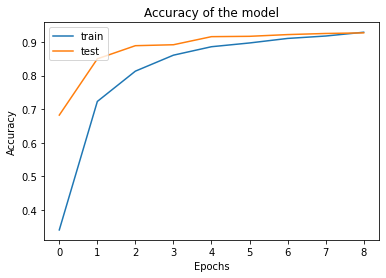

In [25]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

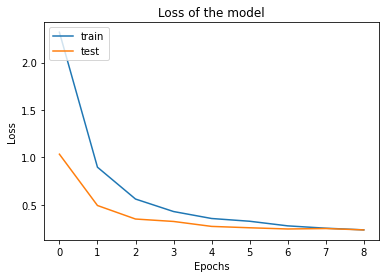

In [26]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss of the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

### Indexing the Output Variables

In [27]:
index = ['0','1','2','3','4','5','6','7','8','9']

## Making Predictions

### Prediction 1 (Number 7)

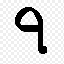

In [28]:
test_image1 = image.load_img('../input/my-validation/user_input_1.png',target_size = (64, 64))
test_image1

In [29]:
test_image1 = image.img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1,axis=0)
result1 = np.argmax(cnn.predict(test_image1/255.0),axis=1)
print(index[result1[0]])

0


### Prediction 2 (Number 2)

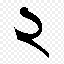

In [30]:
test_image2 = image.load_img('../input/my-validation/user_input_2.png',target_size = (64, 64))
test_image2

In [31]:
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2,axis=0)
result2 = np.argmax(cnn.predict(test_image2/255.0),axis=1)
print(index[result2[0]])

0


### Prediction 3 (Number 1)

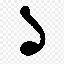

In [32]:
test_image3 = image.load_img('../input/my-validation/user_input_3.png',target_size = (64, 64))
test_image3

In [33]:
test_image3 = image.img_to_array(test_image3)
test_image3 = np.expand_dims(test_image3,axis=0)
result3 = np.argmax(cnn.predict(test_image3/255.0),axis=1)
print(index[result3[0]])

0


### Prediction 4 (Number 8)

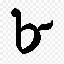

In [34]:
test_image4 = image.load_img('../input/my-validation/user_input_4.png',target_size = (64, 64))
test_image4

In [35]:
test_image4 = image.img_to_array(test_image4)
test_image4 = np.expand_dims(test_image4,axis=0)
result4 = np.argmax(cnn.predict(test_image4/255.0),axis=1)
print(index[result4[0]])

0


### Prediction 5 (Number 5)

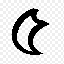

In [36]:
test_image5 = image.load_img('../input/my-validation/user_input_5.png',target_size = (64, 64))
test_image5

In [37]:
test_image5 = image.img_to_array(test_image5)
test_image5 = np.expand_dims(test_image5,axis=0)
result5 = np.argmax(cnn.predict(test_image5/255.0),axis=1)
print(index[result5[0]])

0


### Prediction 6 (Number 2)

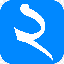

In [38]:
test_image6 = image.load_img('../input/my-validation/user_input_6.png',target_size = (64, 64))
test_image6

In [39]:
test_image6 = image.img_to_array(test_image6)
test_image6 = np.expand_dims(test_image6,axis=0)
result6 = np.argmax(cnn.predict(test_image6/255.0),axis=1)
print(index[result6[0]])

0


### Prediction 7 (Number 4 [P.S. - This is actually an english 8])

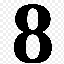

In [40]:
test_image7 = image.load_img('../input/my-validation/user_input_7.png',target_size = (64, 64))
test_image7

In [41]:
test_image7 = image.img_to_array(test_image7)
test_image7 = np.expand_dims(test_image7,axis=0)
result7 = np.argmax(cnn.predict(test_image7/255.0),axis=1)
print(index[result7[0]])

0


## Making a Drawing Pad for User Input

In [42]:
# from PIL import ImageTk, Image, ImageDraw
# import PIL
# from tkinter import *

# width = 500  # canvas width
# height = 500 # canvas height
# center = height//2
# white = (255, 255, 255) # canvas back

# def save():
#     # save image to hard drive
#     filename = "D:/bengali digit classification/bengali_digits/validate/user_input_drawn.jpg"
#     output_image.save(filename)

# def paint(event):
#     x1, y1 = (event.x - 1), (event.y - 1)
#     x2, y2 = (event.x + 1), (event.y + 1)
#     canvas.create_oval(x1, y1, x2, y2, fill="black",width=20)
#     draw.line([x1, y1, x2, y2],fill="black",width=20)

# master = Tk()

# # create a tkinter canvas to draw on
# canvas = Canvas(master, width=width, height=height, bg='white')
# canvas.pack()

# # create an empty PIL image and draw object to draw on
# output_image = PIL.Image.new("RGB", (width, height), white)
# draw = ImageDraw.Draw(output_image)
# canvas.pack(expand=YES, fill=BOTH)
# canvas.bind("<B1-Motion>", paint)

# # add a button to save the image
# button=Button(text="Save",command=save)
# button.pack()

# master.mainloop()

### Predicting User Input (Number 6)

In [43]:
# test_image_drawn = image.load_img('D:/bengali digit classification/bengali_digits/validate/user_input_drawn.jpg',target_size = (64, 64))
# test_image_drawn

In [44]:
# test_image_drawn = image.img_to_array(test_image_drawn)
# test_image_drawn = np.expand_dims(test_image_drawn,axis=0)
# result_drawn = np.argmax(cnn.predict(test_image_drawn/255.0),axis=1)
# print(index[result_drawn[0]])